<a href="https://colab.research.google.com/github/AlejandroAlberoni/treinamento-h2ia/blob/main/Taboo_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taboo-search is a meta-heuristic algorithm used in many fields and to a large kind of problems such as: embedded circuits desining, scheduling, pattern classification, resources optimization, financial analysis , and many hard NP problems. Taboo-search, instead of getting trapped in local optimals, uses a mechanism that allows itself to accept (determined cycles) lower objective-function states, which makes the algorithm efficiently move to a global optimal. 

**This notebook uses Taboo Search to solve binary knapsack problem in python**

Given object weights and values, and maximum weight limit for the knapsack:



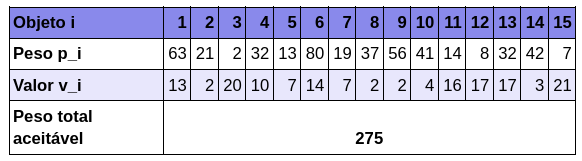

In [1]:
from copy import deepcopy
import random

MAX_WEIGHT = 275
weight = [63, 21, 2, 32, 13, 80, 19, 37, 56, 41, 14, 8, 32, 42, 7]
value = [13, 2, 20, 10, 7, 14, 7, 2, 2, 4, 16, 17, 17, 3, 21]
items = {i: v for i, v in enumerate(zip(weight, value))}

In [2]:
class Knapsack:
    def __init__(self):
        self.items = items
        self.neighbors = None
        self.arrange = None

    def set_arrange(self, arrange):
        self.arrange = arrange
        self.set_neighbors()

    def set_neighbors(self):
        self.neighbors = []
        for i, v in enumerate(self.arrange):
            tmp = deepcopy(self.arrange)
            if v:
                tmp[i] = 0
            else:
                tmp[i] = 1
            self.neighbors.append(tmp)

In [3]:
class TabooGuider:
    def __init__(self, best_solution):
        self.items = items
        self.maxiter = 300
        self.tabooTime = []
        self.tabooList = []
        self.classifiedCombinations = None
        self.best_solution = best_solution

    def set_taboo_list(self, arrange):
        if arrange in self.tabooList:
            print("Error detected")
        if arrange not in self.tabooList:
            self.tabooList.append(arrange)
            self.tabooTime.append(self.maxiter)

    def perform_taboo_list(self):
        indexes_to_exclude = []
        for i, v in enumerate(self.tabooTime):
            v -= 1
            if v == 0:
                indexes_to_exclude.append(i)
        if indexes_to_exclude:
            for i in indexes_to_exclude:
                self.tabooList.pop(i)
                self.tabooTime.pop(i)

    def get_classified_arrange(self, arrange):
        current_weight = 0
        current_value = 0
        for i, v in enumerate(arrange):
            if v:
                current_weight += self.items[i][0]
                current_value += self.items[i][1]
        return [deepcopy(arrange), current_weight, current_value]

    def set_measured_neighbors(self, neighbors):
        self.classifiedCombinations = []
        for i in neighbors:
            tmp = self.get_classified_arrange(i)
            self.classifiedCombinations.append(tmp)

    def best_neighbor(self, neighbors):
        self.set_measured_neighbors(neighbors)
        filtered_neighbors = self.fix_neighbors()
        best = filtered_neighbors[0]
        for i in filtered_neighbors:
            if i[2] > best[2]:
                best = i
        return best[0]

    def fix_neighbors(self):
        fixed_neighbors = []
        for i in self.classifiedCombinations:
            if i[0] in self.tabooList or i[1] > MAX_WEIGHT:
                continue
            fixed_neighbors.append(i)
        return fixed_neighbors

In [4]:
def taboo_search(maxiterations=5000, tabooguider=None, initConfig=None):
    counter = 0
    relativecounter = 0
    solution = initConfig
    bestsolution = initConfig
    knapsack = Knapsack()
    knapsack.set_arrange(solution)
    tabooguider.set_taboo_list(solution)
    while counter - relativecounter <= maxiterations:
        tabooguider.perform_taboo_list()
        solution = tabooguider.best_neighbor(knapsack.neighbors)
        if tabooguider.get_classified_arrange(solution)[2] > tabooguider.get_classified_arrange(bestsolution)[2]:
            bestsolution = solution
            relativecounter = deepcopy(counter)
        tabooguider.set_taboo_list(solution)
        knapsack.set_arrange(solution)
        counter += 1
    classified = tabooguider.get_classified_arrange(bestsolution)
    return f'knapsack final state is: {classified[0]} at value:{classified[2]} and weight:{classified[1]}'


def get_random_start(): #gets random start weighting less than 275
    while True:
        tmp = 0
        random_arrange = [random.randint(0,1) for i in items]
        for i, v in enumerate(random_arrange):
            if v:
                tmp += items[i][0]
        if tmp < MAX_WEIGHT:
            return random_arrange

In [5]:
randomstart = get_random_start()
tabooguider = TabooGuider(best_solution=randomstart)
classified = tabooguider.get_classified_arrange(randomstart)
print(f'random generated state: {classified[0]}, with value:{classified[2]}, and weight:{classified[1]}')
finalsolution = taboo_search(initConfig=randomstart, tabooguider=tabooguider)
print(finalsolution)

random generated state: [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], with value:50, and weight:237
knapsack final state is: [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1] at value:142 and weight:270
